<a href="https://colab.research.google.com/github/utk468/flower_classification/blob/main/flower_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
marquis03_flower_classification_path = kagglehub.dataset_download('marquis03/flower-classification')

print('Data source import complete.')


In [ ]:
import kagglehub


path = kagglehub.dataset_download("marquis03/flower-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flower-classification


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/flower-classification/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/flower-classification/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 13642 images belonging to 14 classes.
Found 98 images belonging to 14 classes.


In [ ]:

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(14, activation='softmax')
])


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7
)


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)


loss, accuracy = model.evaluate(val_generator)
print(f"Val Accuracy: {accuracy:.2f}")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 168s 368ms/step - accuracy: 0.2768 - loss: 4.9294 - val_accuracy: 0.7653 - val_loss: 2.9225 - learning_rate: 1.0000e-04
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 151s 348ms/step - accuracy: 0.6544 - loss: 3.1828 - val_accuracy: 0.8061 - val_loss: 2.4904 - learning_rate: 1.0000e-04
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 152s 349ms/step - accuracy: 0.7264 - loss: 2.7171 - val_accuracy: 0.8367 - val_loss: 2.1860 - learning_rate: 1.0000e-04
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 153s 352ms/step - accuracy: 0.7711 - loss: 2.3412 - val_accuracy: 0.8367 - val_loss: 1.9254 - learning_rate: 1.0000e-04
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 151s 346ms/step - accuracy: 0.7899 - loss: 2.0482 - val_accuracy: 0.8367 - val_loss: 1.7588 - learning_rate: 1.0000e-04
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 153s 352ms/step - accuracy: 0.8105 - loss: 1.8022 - val_accuracy: 0.8367 - val_loss: 1.5307 - learning_rate: 1.

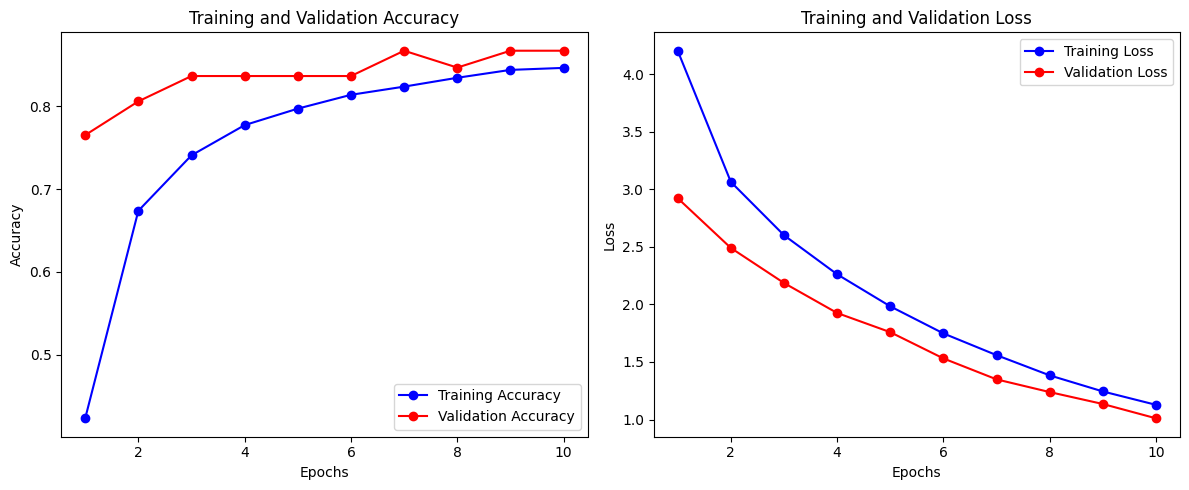

In [ ]:
import matplotlib.pyplot as plt


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()